## Calculate descriptors and draw heatmap
This sample show how to load date from XenonPy's preset dataset then calculate descriptors by use `ElementDesc` and `RDFDesc`.

### composition descriptors
load compound's properties fetched from Materials Project database

In [1]:
from xenonpy.datatools import preset

props = preset.mp_inorganic
props.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69640 entries, mp-10006 to mp-999484
Data columns (total 18 columns):
band_gap                     69640 non-null float64
composition                  69640 non-null object
density                      69640 non-null float64
e_above_hull                 69640 non-null float64
efermi                       69640 non-null float64
elements                     69640 non-null object
final_energy_per_atom        69640 non-null float64
formation_energy_per_atom    69640 non-null float64
has_bandstructure            69640 non-null bool
n_elemets                    69640 non-null int64
nsites                       69640 non-null int64
oxide_type                   69640 non-null object
point_group                  69640 non-null object
pretty_formula               69640 non-null object
space_group                  69640 non-null object
space_group_number           69640 non-null int64
total_magnetization          69640 non-null float64
volume          

### calculate descriptors from composition

In [2]:
from xenonpy.descriptor import Composition

desc = Composition().fit_transform(props)
desc.info()

converting 69640 compounds
<class 'pandas.core.frame.DataFrame'>
Index: 69640 entries, mp-10006 to mp-999484
Columns: 290 entries, ave:atomic_number to min:Polarizability
dtypes: float64(290)
memory usage: 154.6+ MB


In [3]:
# save descriptors if none
from xenonpy.datatools import LocalStorage

descriptors_dataset = LocalStorage('descriptors')
try:
    descriptors_dataset.last('elemental')
except FileNotFoundError:
    descriptors_dataset(desc)

### draw elemental descriptors heatmap

As a example, we resort descriptors with property `density`

<class 'pandas.core.frame.DataFrame'>
Index: 23776 entries, mp-1006278 to mp-999137
Data columns (total 18 columns):
band_gap                     23776 non-null float64
composition                  23776 non-null object
density                      23776 non-null float64
e_above_hull                 23776 non-null float64
efermi                       23776 non-null float64
elements                     23776 non-null object
final_energy_per_atom        23776 non-null float64
formation_energy_per_atom    23776 non-null float64
has_bandstructure            23776 non-null bool
n_elemets                    23776 non-null int64
nsites                       23776 non-null int64
oxide_type                   23776 non-null object
point_group                  23776 non-null object
pretty_formula               23776 non-null object
space_group                  23776 non-null object
space_group_number           23776 non-null int64
total_magnetization          23776 non-null float64
volume        

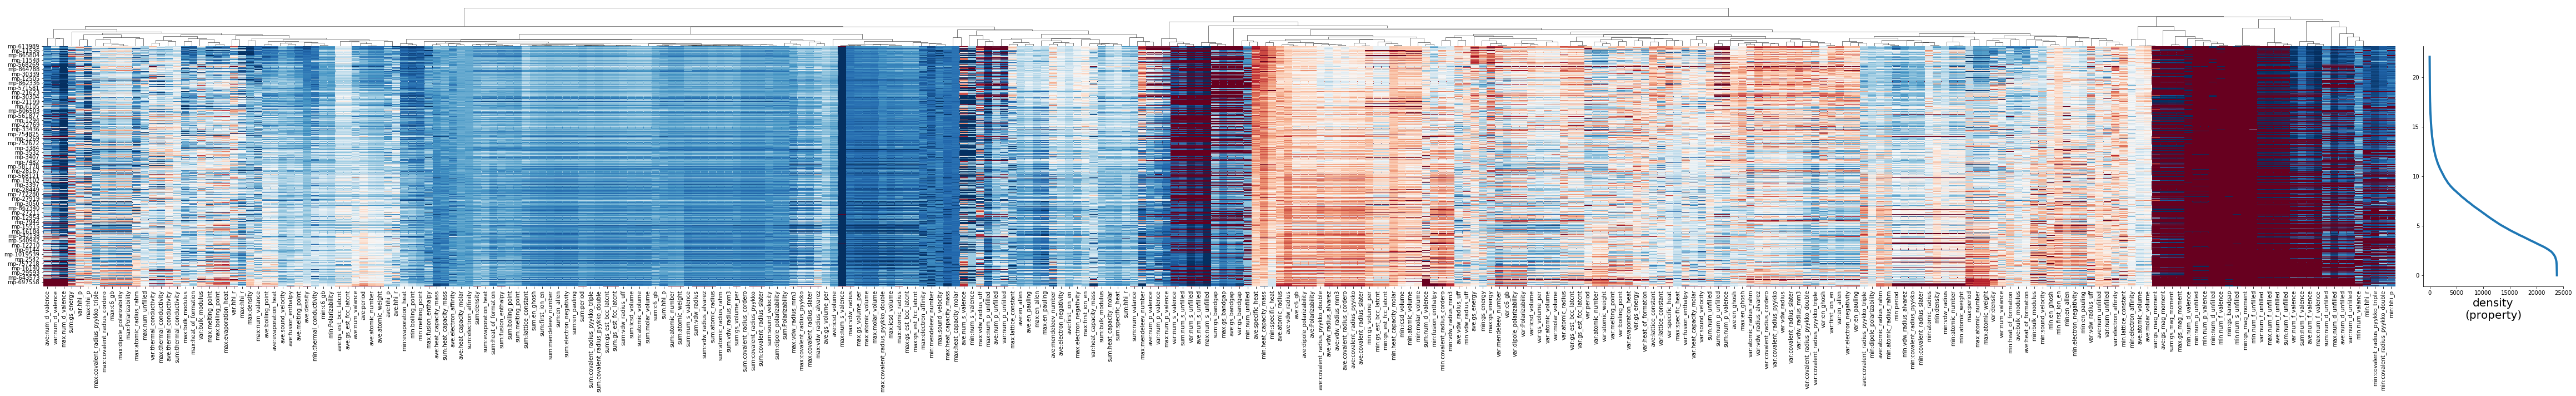

In [4]:
%matplotlib inline
from xenonpy.visualization import DescriptorHeatmap

# select stable structure
props = props[props.e_above_hull == 0]
print(props.info())

dens = props[props['density'] != 0]
dens = dens.sort_values(by='density', ascending=False)
desc_dens = desc.loc[dens.index, :]
dens = dens['density']

# draw heatmap
dh_map = DescriptorHeatmap(
    #     save=dict(fname='density_desc.png', dpi=150, bbox_inches='tight', transparent=False),
    method='complete',
    bc=True,  # box-cox transfer
    figsize=(70, 10))

dh_map.fit(desc_dens)
dh_map.draw(dens)

### calculate descriptors from structures

calculate rdf from structures

In [5]:
# load structures
structures = preset.mp_structure
structures

,structure
mp-10006,"[[2.84533936 1.18537303 4.03371273] Ag, [1.627..."
mp-10018,[[0. 0. 0.] Ac]
mp-1006068,"[[0. 0. 0.] Gd, [3.56691228 3.56691228 3.56691..."
mp-1006278,"[[5.82428798 5.82428798 5.82428798] Eu, [1.941..."
mp-1008601,"[[0. 0. 0.] Zr, [1.79018205 1.79018205 1.55141..."
mp-1008617,"[[0. 0. 0.] Yb, [1.86405151 1.86405151 1.61420..."
mp-1008653,"[[0. 0. 0.] Ag, [ 2.335 2.335 -2.335] C]"
mp-1008813,"[[ 3.19152121 3.19152121 -3.19152121] Rb, [0...."
mp-1008866,"[[ 2.85247513 2.85247513 -2.85247513] Na, [0...."
mp-1008903,"[[ 3.28439812 3.28439812 -3.28439812] Mg, [ 4..."


In [6]:
from xenonpy.descriptor import RadialDistributionFunction

# long time consuming, need 4~7 hours which is dependent on your machine
rdf = RadialDistributionFunction().fit_transform(structures)
rdf.info()

converting 69640 structure
using 24125.71856s
<class 'pandas.core.frame.DataFrame'>
Index: 69640 entries, mp-10006 to mp-999484
Columns: 150 entries, 0.13333333333333333 to 20.0
dtypes: float64(150)
memory usage: 80.2+ MB


In [7]:
try:
    descriptors_dataset.last('rdf')
except FileNotFoundError:
    descriptors_dataset(rdf)

In [14]:
# draw heatmap
props = preset.mp_inorganic
dens = props[props['density'] != 0]
dens = dens.sort_values(by='density', ascending=False)
dens = dens['density']
rdf_dens = rdf.loc[dens.index, :]
dens

mp-107        24.579226
mp-571261     23.026965
mp-10207      22.164993
mp-613989     22.087251
mp-49         21.993742
mp-101        21.930123
mp-8643       21.910957
mp-867792     21.676368
mp-867141     21.666896
mp-867305     21.537253
mp-11534      21.357040
mp-30745      21.330337
mp-7098       21.317166
mp-867264     20.894177
mp-974430     20.870529
mp-862589     20.812138
mp-265        20.760332
mp-126        20.603403
mp-8          20.530089
mp-30744      20.517733
mp-975065     20.505247
mp-862798     20.499321
mp-8642       20.455111
mp-1018129    20.447705
mp-1044       20.343101
mp-978096     20.184638
mp-2126       20.070223
mp-2840       20.044024
mp-974408     20.001815
mp-974416     19.983997
                ...    
mp-555394      0.571901
mp-10173       0.570871
mp-51          0.570151
mp-12103       0.544260
mp-672234      0.536142
mp-997569      0.528387
mp-614456      0.525676
mp-604313      0.520513
mp-23156       0.461975
mp-1021328     0.433068
mp-674158      0

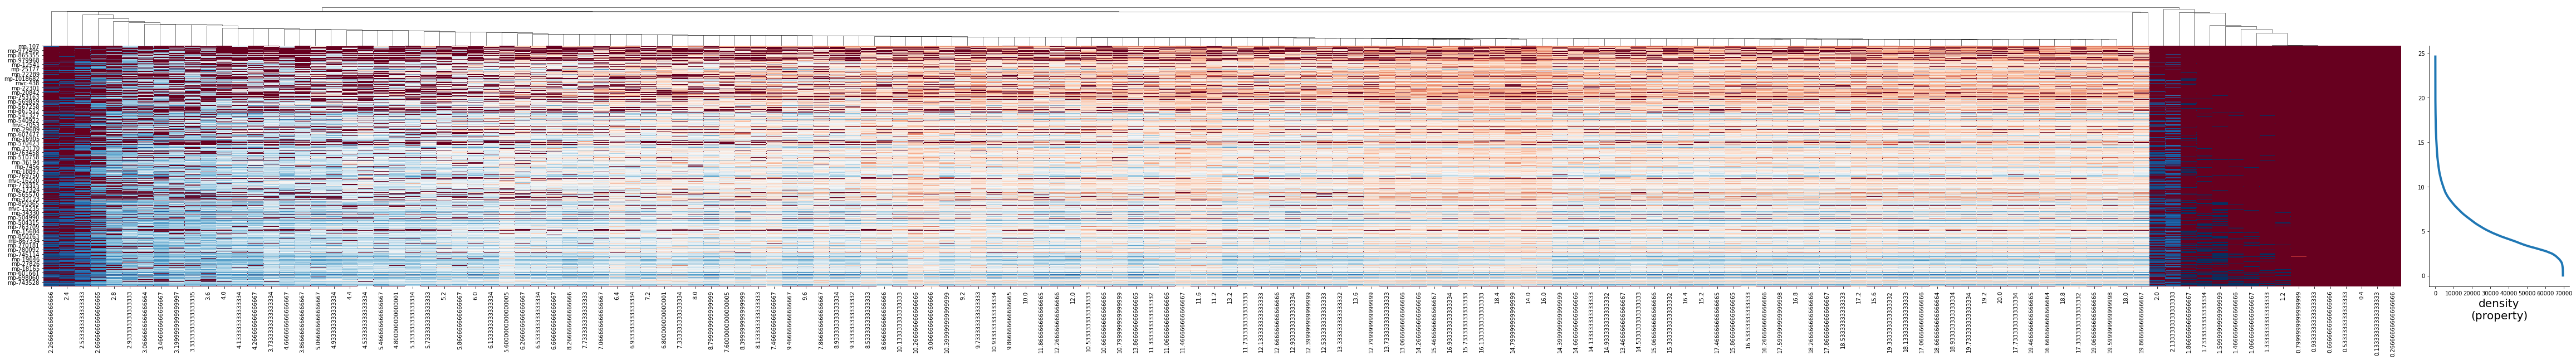

In [15]:
dh_map = DescriptorHeatmap(
    #     save=dict(fname='density_desc.png', dpi=150, bbox_inches='tight', transparent=False),
    method='average',
    bc=True,  # box-cox transfer
    figsize=(70, 10))

dh_map.fit(rdf_dens)
dh_map.draw(dens)